Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import metrics
import seaborn as sb

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

Import data

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
data.shape

(215, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Clean up data

In [7]:
data = pd.get_dummies(data, columns=["gender"], prefix=["gender"])
data = pd.get_dummies(data, columns=["ssc_b"], prefix=["ssc_b"])
data = pd.get_dummies(data, columns=["hsc_b"], prefix=["hsc_b"])
data = pd.get_dummies(data, columns=["hsc_s"], prefix=["hsc_s"])
data = pd.get_dummies(data, columns=["degree_t"], prefix=["degree_t"])
data = pd.get_dummies(data, columns=["workex"], prefix=["workex"])
data = pd.get_dummies(data, columns=["specialisation"], prefix=["specialisation"])

data.status = data.status.map({'Placed': 1, 'Not Placed': 0})
data = data.reindex(columns = [col for col in data.columns if col != 'status'] + ['status'])

data.drop(['sl_no','salary'], axis=1, inplace=True)


In [8]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,...,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,...,0,1,0,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,...,0,0,1,0,0,1,0,1,0,1
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,...,0,1,0,0,1,1,0,0,1,0
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,...,1,0,1,0,0,1,0,1,0,1


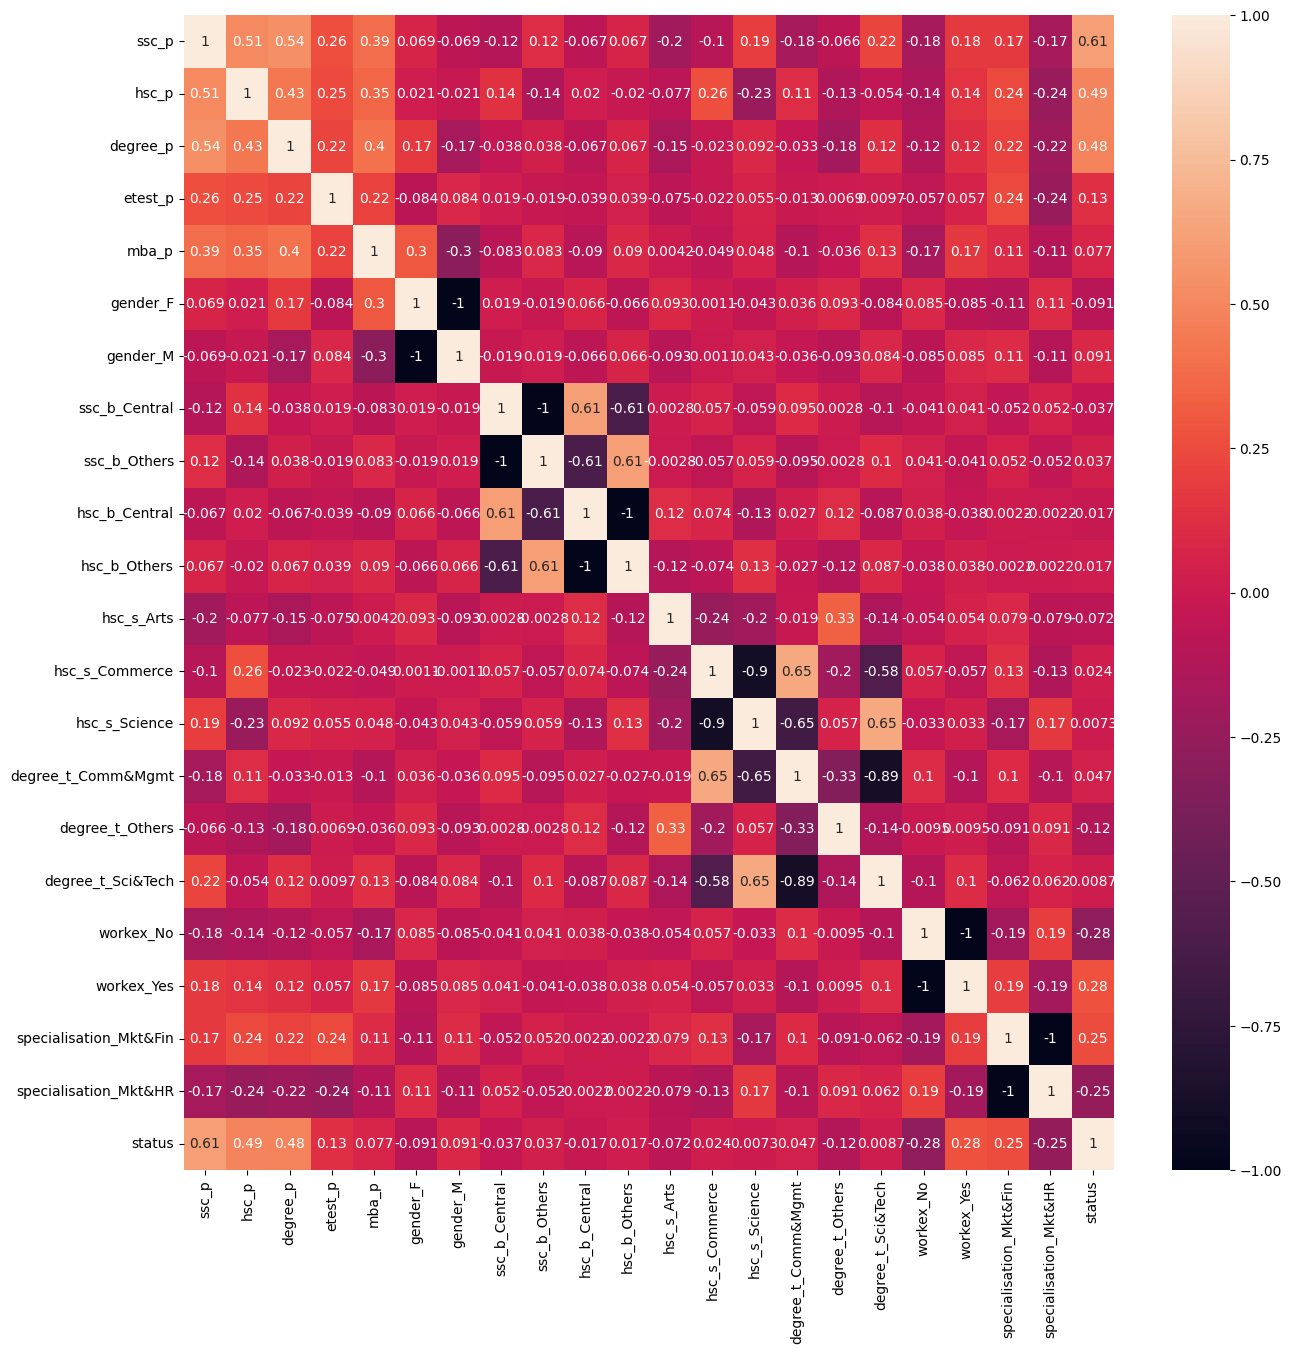

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(data.corr(), annot= True)
plt.show()

In [10]:
X = data.drop(['status'],axis=1)
y = data['status']

Split train test data

In [11]:
# Test and Train split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.70, stratify=y, random_state=0)

Define Model

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), GradientBoostingClassifier()]

scaler = MinMaxScaler()

In [13]:
for estimator in estimators:
    pipeline = make_pipeline(scaler,estimator)
    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)
    print("-"*10 + str(estimator) + "-"*10)
    print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred)))
    print('Precision Score : ' + str(precision_score(Y_test,Y_pred)))
    print('Recall Score : ' + str(recall_score(Y_test,Y_pred)))
    print('F1 Score : ' + str(f1_score(Y_test,Y_pred)))
    print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,Y_pred)))

----------DecisionTreeClassifier()----------
Accuracy Score : 0.7846153846153846
Precision Score : 0.8163265306122449
Recall Score : 0.8888888888888888
F1 Score : 0.851063829787234
Confusion Matrix : 
[[11  9]
 [ 5 40]]
----------RandomForestClassifier()----------
Accuracy Score : 0.8307692307692308
Precision Score : 0.8541666666666666
Recall Score : 0.9111111111111111
F1 Score : 0.8817204301075269
Confusion Matrix : 
[[13  7]
 [ 4 41]]
----------GaussianNB()----------
Accuracy Score : 0.8
Precision Score : 0.8478260869565217
Recall Score : 0.8666666666666667
F1 Score : 0.8571428571428571
Confusion Matrix : 
[[13  7]
 [ 6 39]]
----------GradientBoostingClassifier()----------
Accuracy Score : 0.8307692307692308
Precision Score : 0.8541666666666666
Recall Score : 0.9111111111111111
F1 Score : 0.8817204301075269
Confusion Matrix : 
[[13  7]
 [ 4 41]]


KFold

In [14]:
kfold = KFold(n_splits=5, shuffle=True)

for estimator in estimators:
    pipeline = make_pipeline(scaler,estimator)
    results = cross_val_score(pipeline, X, y, cv=kfold)
    print("-"*10 + str(estimator) + "-"*10)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

----------DecisionTreeClassifier()----------
Baseline: 80.47% (5.99%)
----------RandomForestClassifier()----------
Baseline: 87.91% (4.97%)
----------GaussianNB()----------
Baseline: 78.60% (4.74%)
----------GradientBoostingClassifier()----------
Baseline: 86.51% (4.00%)


In [38]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 20, 50],
    'max_features': [5, 8, 10],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'max_depth': 10, 'max_features': 10, 'n_estimators': 200}

In [39]:
pipeline = make_pipeline(scaler,RandomForestClassifier(
    max_depth= 10,
    max_features= 10,
   n_estimators= 200))
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,Y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,Y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,Y_pred)))

Accuracy Score : 0.8153846153846154
Precision Score : 0.8367346938775511
Recall Score : 0.9111111111111111
F1 Score : 0.8723404255319148
Confusion Matrix : 
[[12  8]
 [ 4 41]]
